In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("/Users/aj/MLEEP/Notebook/data/stud.csv")

In [3]:
X = df.drop(columns = ['math_score'], axis=1)
Y = df['math_score']

In [9]:
numeric_features  = X.select_dtypes(exclude='object').columns
catagorical_features = X.select_dtypes(include="object").columns
print('numeric_features: ' ,numeric_features,  '\n','catagorical_features: ' ,catagorical_features)

numeric_features:  Index(['reading_score', 'writing_score'], dtype='object') 
 catagorical_features:  Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [18]:
df[catagorical_features].nunique()

gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, catagorical_features),
         ("StandardScaler", numeric_transformer, numeric_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

In [28]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3242
- Mean Absolute Error: 4.2684
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4011
- Mean Absolute Error: 4.2176
- R2 Score: 0.8801


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
-----------------------

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880118
5,Random Forest Regressor,0.853551
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848360
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.753882


In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.01


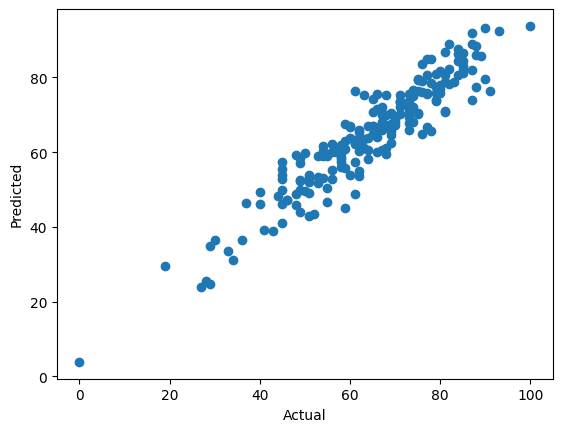

In [33]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [34]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.453125,14.546875
737,53,58.968750,-5.968750
740,80,76.890625,3.109375
660,74,76.703125,-2.703125
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.515625,8.484375
332,62,62.031250,-0.031250
208,74,67.968750,6.031250
613,65,67.109375,-2.109375
